In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
sharks_ss1 = pd.read_csv('sharks cleaning.csv', encoding='latin1')

In [12]:
#1. What is the distribution of number of shark attacks by age? 
#Does this show a tendency for sharks to attack smaller people, in this case children? 
#Is the age of victims more distributed towards children than the distribution of the general population?

In [13]:
condition_age = sharks_ss1['Age'] != 'unknown'
condition_country = sharks_ss1['Country'] == 'USA'
condition_activity = sharks_ss1['Simplified activity'] == 'Swimming'
sharks_q1 = sharks_ss1[condition_age & condition_country & condition_activity]

In [94]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

<function matplotlib.pyplot.show(close=None, block=None)>

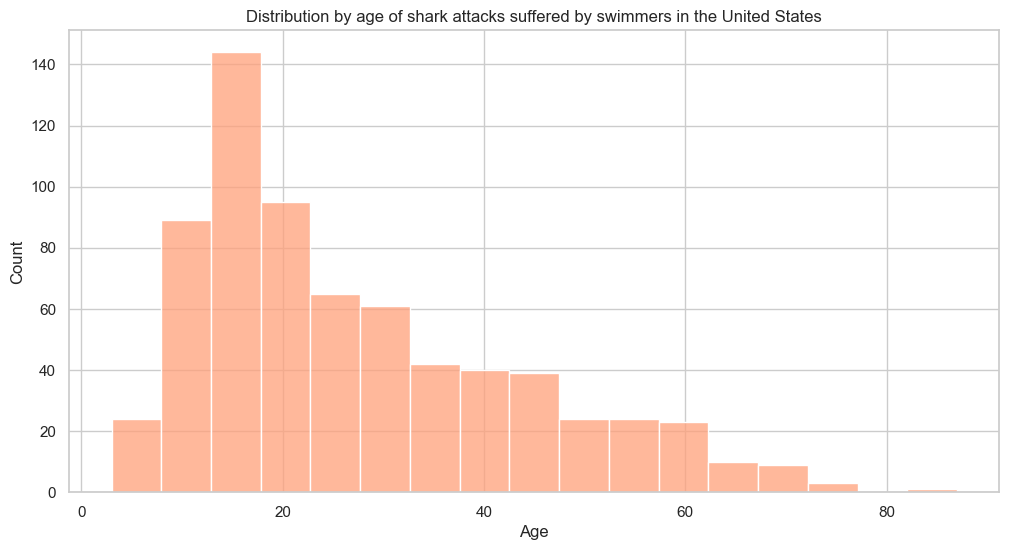

In [96]:
Age_as_float = sharks_q1['Age'].astype(float)
sns.histplot(x=Age_as_float, binwidth = 5, color = "#FFA07A")
plt.title("Distribution by age of shark attacks suffered by swimmers in the United States")
plt.savefig("images/figure1.png")
plt.show


In [24]:
#Compare with Australia?

In [25]:
condition_country_aus = sharks_ss1['Country'] == 'AUSTRALIA'
sharks_q1_2 = sharks_ss1[condition_age & condition_country_aus & condition_activity]

<function matplotlib.pyplot.show(close=None, block=None)>

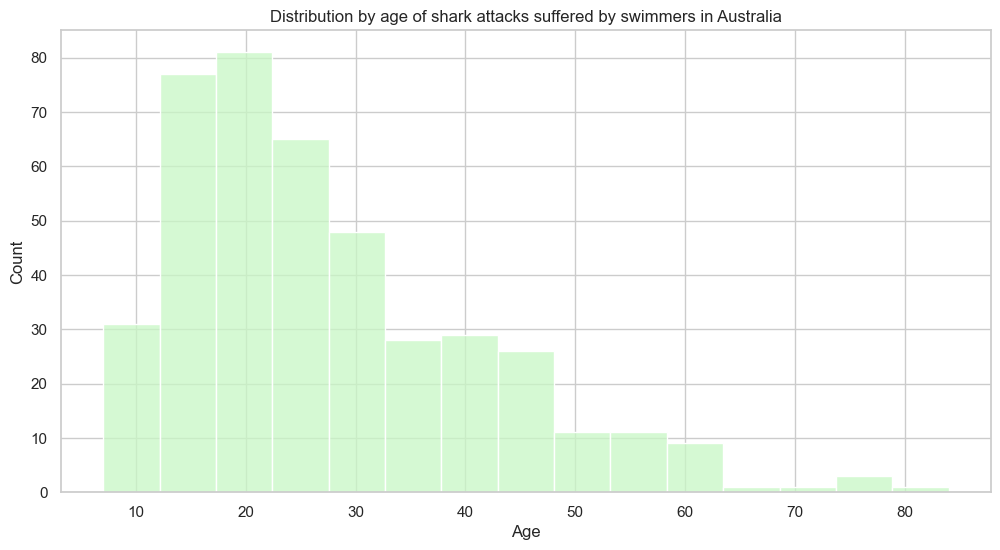

In [97]:
Age_as_float = sharks_q1_2['Age'].astype(float)
sns.histplot(x=Age_as_float, binwidth = 5, color = "#C8F7C5")
plt.title("Distribution by age of shark attacks suffered by swimmers in Australia")
plt.savefig("images/figure2.png")
plt.show

In [27]:
#Similar distribution overall - but much more of a skew towards children (10-15 and 5-10) in Australia. 
#Conclusions:
        #Overall: Size doesn't matter much. Age definitely does - distribution skews more towards young people, but especially from 15 onwards - so more down to young people being more reckless, than smaller in size.
        #Even though - children get attacked more in Australia. So even though size matters very little, it seems to matter more in Australia - where if you are a small child you are more likely to get attacked.
        #So does size matter? A little bit, but not much.

In [29]:
#2. What is the distribution of number of shark attacks by shark size? Are they normally distributed, do bigger sharks attack more? Is there a correlation between size of shark and number of attacks? 

In [30]:
condition_sharksize = sharks_ss1['Shark Size'] != 'unknown'
condition_sharksize2 = sharks_ss1['Shark Size'] != None
sharks_q2_step1 = sharks_ss1[condition_sharksize & condition_sharksize2]

In [31]:
condition_sharksize3 = sharks_q2_step1['Shark Size'].astype(float) < 10
condition_country = sharks_ss1['Country'] == 'USA'
sharks_q2 = sharks_q2_step1[condition_sharksize3 & condition_country & condition_activity]

/var/folders/q9/jkycd7cd6tqdf410bnlz4q2c0000gn/T/ipykernel_84591/1610732880.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sharks_q2 = sharks_q2_step1[condition_sharksize3 & condition_country & condition_activity]


<function matplotlib.pyplot.show(close=None, block=None)>

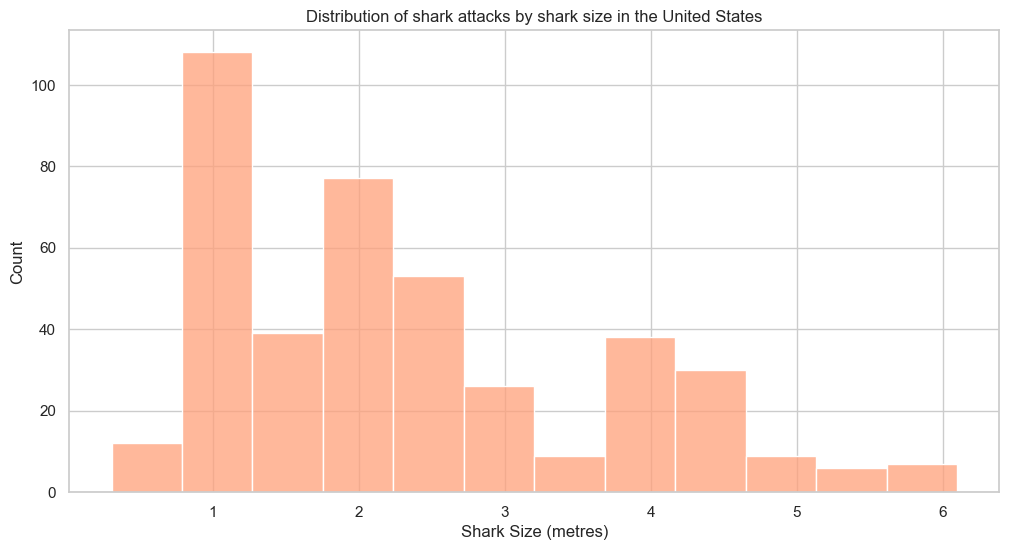

In [98]:
size_as_float = sharks_q2['Shark Size'].astype(float)
sns.histplot(x=size_as_float, binwidth = 0.5, color = "#FFA07A")
plt.title("Distribution of shark attacks by shark size in the United States")
plt.xlabel("Shark Size (metres)")
plt.savefig("images/figure3.png")
plt.show

In [83]:
#Conclusion; smaller sharks attack more! So size DOES matter, but not how we expect?

In [84]:
#Let's compare to Australia! 

In [34]:
sharks_q2_aus = sharks_q2_step1[condition_sharksize3 & condition_country_aus]

/var/folders/q9/jkycd7cd6tqdf410bnlz4q2c0000gn/T/ipykernel_84591/4174323748.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sharks_q2_aus = sharks_q2_step1[condition_sharksize3 & condition_country_aus]


<function matplotlib.pyplot.show(close=None, block=None)>

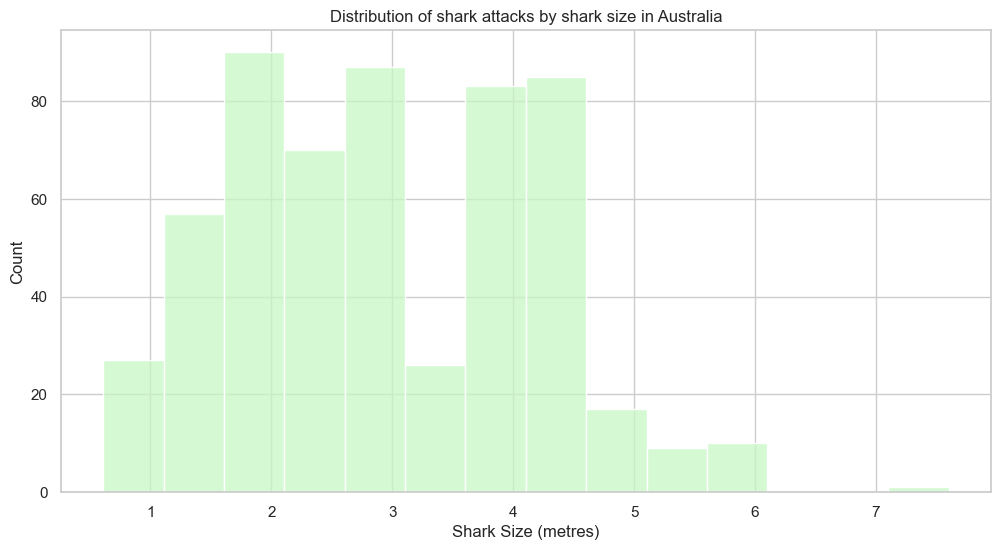

In [99]:
size_as_float = sharks_q2_aus['Shark Size'].astype(float)
sns.histplot(x=size_as_float, binwidth = 0.5, color = "#C8F7C5")
plt.title("Distribution of shark attacks by shark size in Australia")
plt.xlabel("Shark Size (metres)")
plt.savefig("images/figure4.png")
plt.show

In [51]:
#Size matters less in Australia than in the US. There is more of a 'normal' distribution - still not the case that a bigger sharks attack more.

In [52]:
#3. Do sharks attack boats or surfboards more?

In [53]:
sharks_ss1['Simplified activity'].value_counts()

Simplified activity
Swimming    3430
Surfing     1410
Boat         918
unknown      544
Name: count, dtype: int64

In [92]:
condition_activity_q3 = sharks_ss1['Simplified activity'] != 'unknown'
condition_activity_q3_2 = sharks_ss1['Simplified activity'] != 'Swimming'
sharks_q3 = sharks_ss1[condition_activity_q3]

In [55]:
#First worldwide

<function matplotlib.pyplot.show(close=None, block=None)>

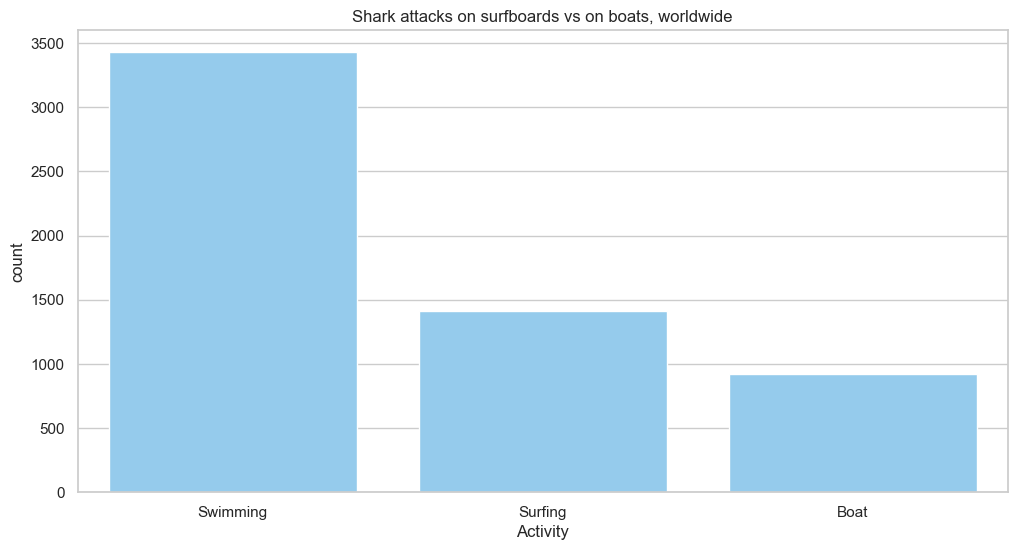

In [101]:
sns.countplot(x=sharks_q3['Simplified activity'], color = "#87CEFA")
plt.xlabel("Activity")
plt.savefig("images/figure5.png")
plt.title("Shark attacks on surfboards vs on boats, worldwide")
plt.show

In [64]:
sharks_q3_aus = sharks_ss1[condition_activity_q3 & condition_activity_q3_2 & condition_country_aus]
sharks_q3_usa = sharks_ss1[condition_activity_q3 & condition_activity_q3_2 & condition_country]

In [65]:
#Now Australia

<function matplotlib.pyplot.show(close=None, block=None)>

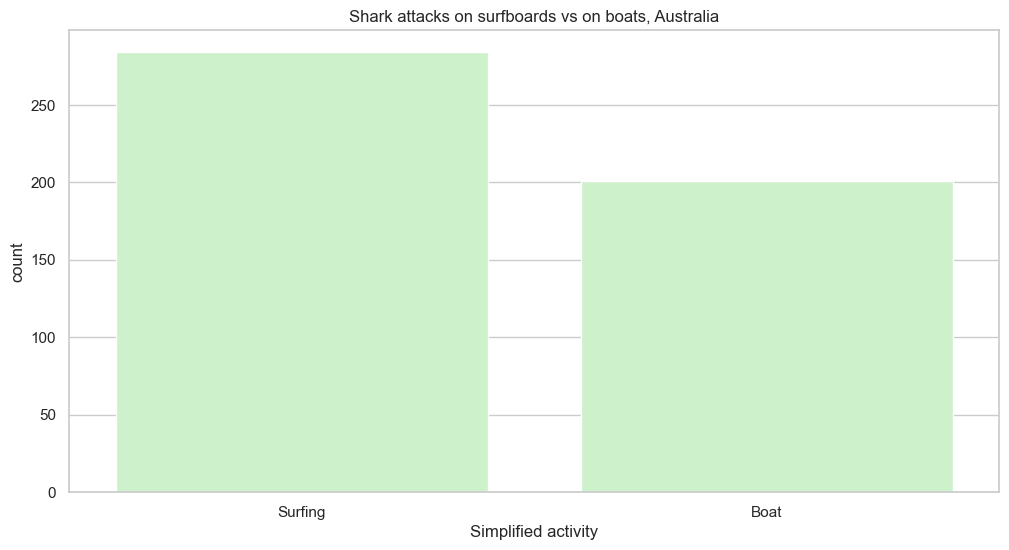

In [102]:
sns.countplot(x=sharks_q3_aus['Simplified activity'], color = "#C8F7C5")
plt.title("Shark attacks on surfboards vs on boats, Australia")
plt.savefig("images/figure6.png")
plt.show

In [67]:
#Now USA

<function matplotlib.pyplot.show(close=None, block=None)>

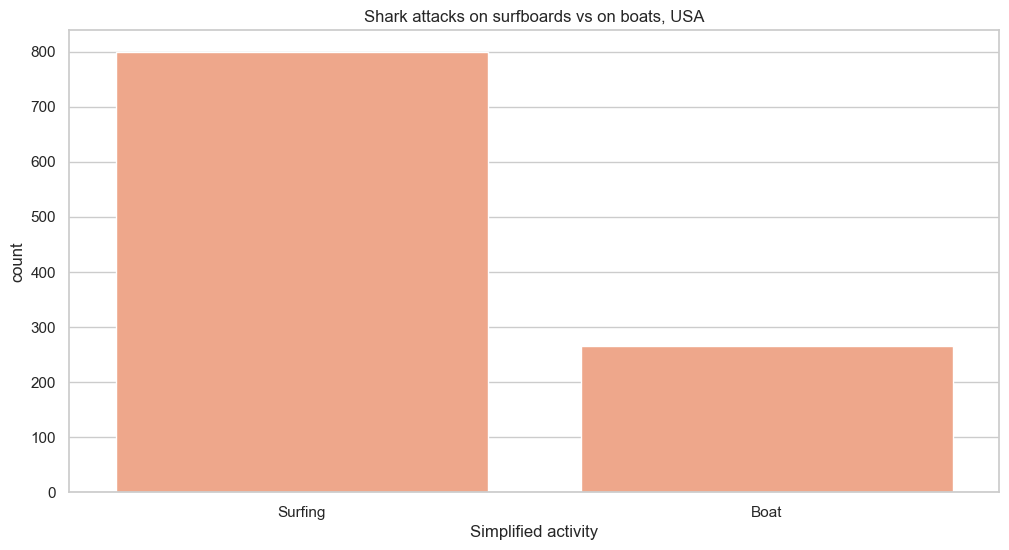

In [103]:
sns.countplot(x=sharks_q3_usa['Simplified activity'], color = "#FFA07A")

plt.title("Shark attacks on surfboards vs on boats, USA")
plt.savefig("images/figure7.png")
plt.show

In [69]:
#So smaller objects get attacked more frequently - size DOES matter? Sharks more aware of and more often attack smaller objects in sea (surfboards) than boats
#However also take into account there are probably more surfboards than boats close ish to shore.

In [70]:
#BONUS QUESTION:
#Is there any correlation between size of shark and age of human they attack? Do bigger sharks attack a certain demographic more? Do children get attacked more by a particular size of shark?

In [73]:
condition_sharksize = sharks_ss1['Shark Size'] != 'unknown'
condition_sharksize2 = sharks_ss1['Shark Size'] != None
condition_age = sharks_ss1['Age'] != 'unknown'
condition_country = sharks_ss1['Country'] == 'USA'
condition_country_aus = sharks_ss1['Country'] == 'AUSTRALIA'
condition_activity = sharks_ss1['Simplified activity'] == 'Swimming'

sharks_bonus_step_1 = sharks_ss1[condition_sharksize & condition_sharksize2 & condition_age & condition_activity]

condition_sharksize3 = sharks_bonus_step_1['Shark Size'].astype(float) < 10

sharks_bonus = sharks_bonus_step_1[condition_sharksize3]

<function matplotlib.pyplot.show(close=None, block=None)>

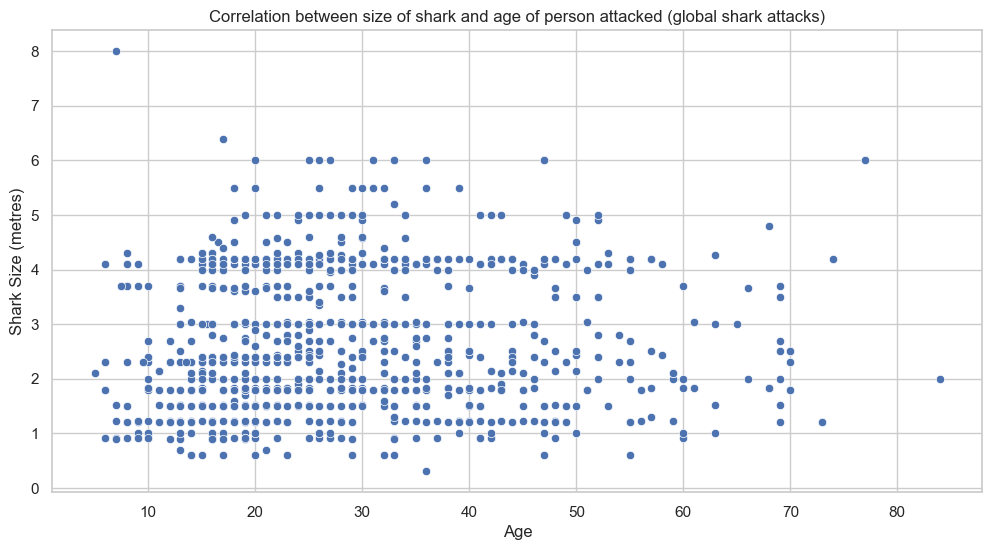

In [104]:
age_as_float_bonus = sharks_bonus['Age'].astype(float)
shark_size_as_float_bonus = sharks_bonus['Shark Size'].astype(float)
plt.title("Correlation between size of shark and age of person attacked (global shark attacks)")
plt.ylabel("Shark Size (metres)")
sns.scatterplot(x= age_as_float_bonus, y=shark_size_as_float_bonus, data=sharks_bonus)
plt.savefig("images/figure8.png")
plt.show

In [82]:
#No correlation - bigger sharks don't prefer smaller humans, children don't get attacked more often by any particuar length of shark

In [84]:
#Conclusions: 
    #Except for certain small exceptions, like children getting attacked more in Australia, size generally doesn't matter.
    # 1.The distribution in age of shark attacks in the US and Australia doesn't vary massively from the age distribution in general. It skews towards young people, but not 'smaller' people. 
    # 2.Bigger sharks do not attack more frequently in this dataset than smaller sharks. In fact, in Australia, the smaller sharks attack more frequently. So there is no indication that bigger sharks attack more.
    # 3.Shark attacks on surfboards are more common in this dataset than attacks on boats. This could indicate that, to a certain degree, size of object to attack DOES matter to sharks. However, the fact swimming, then surfing, then boating are the most common type of attacks, indicate that it is probably more down to how exposed you are to the water. 
    # Bonus: bigger sharks generally don't choose smaller or younger people. Children are not particularly affected by any size of shark. There is no correlation here. 
    # Overall: Despite some exceptions, size doesn't matter - sharks care more about who you are, or about the connection between you and the shark :) (it's a joke)